## In this notebook:
-  **generated a tone analyzer based on watson tone analyzer**

-  **applied the analyzer to lyrics**

-  **catagorized songs based on tone generated, and mapped the results  **





## Tone Dictionary ##
**emotional tones**
-  Anger is evoked due to injustice, conflict, humiliation, negligence, or betrayal. If anger is active, the individual attacks the target, verbally or physically. If anger is passive, the person silently sulks and feels tension and hostility. (An emotional tone.)
-  Fear is a response to impending danger. It is a survival mechanism that is triggered as a reaction to some negative stimulus. Fear can be a mild caution or an extreme phobia. (An emotional tone.)
-  Joy (or happiness) has shades of enjoyment, satisfaction, and pleasure. Joy brings a sense of well-being, inner peace, love, safety, and contentment. (An emotional tone.)
-  Sadness indicates a feeling of loss and disadvantage. When a person is quiet, less energetic, and withdrawn, it can be inferred that they feel sadness. (An emotional tone.)

**language tones**
-  An analytical tone indicates a person's reasoning and analytical attitude about things. An analytical person might be perceived as intellectual, rational, systematic, emotionless, or impersonal. (A language tone.)
-  A confident tone indicates a person's degree of certainty. A confident person might be perceived as assured, collected, hopeful, or egotistical. (A language tone.)
-  A tentative tone indicates a person's degree of inhibition. A tentative person might be perceived as questionable, doubtful, or debatable. (A language tone.)

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import math

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [200]:
from __future__ import print_function
import json
from os.path import join, dirname
from watson_developer_cloud import ToneAnalyzerV3
from watson_developer_cloud.tone_analyzer_v3 import ToneInput

In [201]:
# tone_analyzer = ToneAnalyzerV3(
#     ## url is optional, and defaults to the URL below. Use the correct URL for your region.
#     url="https://gateway-wdc.watsonplatform.net/tone-analyzer/api",
#     username='YOUR SERVICE USERNAME',
#     password='YOUR SERVICE PASSWORD',
#     version='2017-09-26')

tone_analyzer = ToneAnalyzerV3(
    version='2017-09-26',
    iam_api_key=sample_key,
    url="https://gateway-wdc.watsonplatform.net/tone-analyzer/api"
)

In [202]:
lyrics = pd.read_csv('lyrics.csv')


In [117]:
# lyrics.lyrics = lyrics.lyrics.str.replace('[^\w\s]','',regex = True)

In [119]:

# lyrics.lyrics = lyrics['lyrics'].replace('\n',' ',regex=True)



In [135]:

text = lyrics.iloc[0].lyrics
tone_analysis = tone_analyzer.tone(
    {'text': text},
    'application/json')
print(json.dumps(tone_analysis, indent=2))

{
  "document_tone": {
    "tones": [
      {
        "score": 0.605138,
        "tone_id": "fear",
        "tone_name": "Fear"
      },
      {
        "score": 0.980142,
        "tone_id": "tentative",
        "tone_name": "Tentative"
      }
    ]
  },
  "sentences_tone": [
    {
      "sentence_id": 0,
      "text": "Help me, it's like the walls are caving in",
      "tones": [
        {
          "score": 0.5538,
          "tone_id": "tentative",
          "tone_name": "Tentative"
        }
      ]
    },
    {
      "sentence_id": 1,
      "text": "Sometimes I feel like giving up",
      "tones": [
        {
          "score": 0.723489,
          "tone_id": "sadness",
          "tone_name": "Sadness"
        },
        {
          "score": 0.968123,
          "tone_id": "tentative",
          "tone_name": "Tentative"
        },
        {
          "score": 0.944551,
          "tone_id": "analytical",
          "tone_name": "Analytical"
        }
      ]
    },
    {
      "senten

In [203]:
# make a tone generator

sentiments = []
for i in range(74):
    
    text = lyrics.iloc[i].lyrics
    tone_analysis = tone_analyzer.tone(
        {'text': text},
        'application/json')



    sentiments.append(tone_analysis['document_tone']['tones'])


In [204]:
lyrics['sentiments'] = sentiments

In [205]:
lyrics.head(20)

,album,artist,lyrics,song,sentiments
0,Shawn Mendes,Shawn Mendes,"Help me, it's like the walls are caving in\nSo...",In My Blood,"[{'score': 0.605138, 'tone_id': 'fear', 'tone_..."
1,Shawn Mendes,Shawn Mendes,I saw you on a Sunday in a café\nAnd all you d...,Nervous,"[{'score': 0.60734, 'tone_id': 'fear', 'tone_n..."
2,Shawn Mendes,Shawn Mendes,All it'd take is one flight\nWe'd be in the sa...,Lost In Japan,"[{'score': 0.501872, 'tone_id': 'sadness', 'to..."
3,Shawn Mendes,Shawn Mendes,"You said, ""I wanna get to know ya""\nWhy you go...",Where Were You In The Morning?,"[{'score': 0.517037, 'tone_id': 'sadness', 'to..."
4,Shawn Mendes,Shawn Mendes,Sunrise with you on my chest\nNo blinds in the...,Fallin' All In You,"[{'score': 0.5962, 'tone_id': 'joy', 'tone_nam..."
5,Shawn Mendes,Shawn Mendes,"She don't listen to a thing, 'less it feels ri...",Particular Taste,"[{'score': 0.62196, 'tone_id': 'joy', 'tone_na..."
6,Shawn Mendes,Shawn Mendes,"I know a girl, she's like a curse\nWe want eac...",Why,"[{'score': 0.67259, 'tone_id': 'anger', 'tone_..."
7,Shawn Mendes,Shawn Mendes,I think it's time that I be honest\nShould've ...,Because I Had You,"[{'score': 0.557903, 'tone_id': 'sadness', 'to..."
8,Shawn Mendes,Shawn Mendes,It's hard to believe\nYou don't remember me at...,Queen,"[{'score': 0.565925, 'tone_id': 'sadness', 'to..."
9,Shawn Mendes,Shawn Mendes,"I want you close to me\nI want you close, I wa...",Mutual,"[{'score': 0.59863, 'tone_id': 'sadness', 'ton..."


In [171]:
lyrics.columns

Index(['album', 'artist', 'lyrics', 'song', 'sentiments'], dtype='object')

In [174]:
type(lyrics.sentiments)

list

In [206]:
lyrics = pd.DataFrame(lyrics)

In [207]:
lyrics.sentiments = lyrics.sentiments.astype('str')

In [208]:
lyrics[lyrics.sentiments=='[]']

,album,artist,lyrics,song,sentiments
17,Illuminate (Deluxe),Shawn Mendes,You've got my heart\nBut I can't let you keep ...,Don't Be A Fool,[]
19,Illuminate (Deluxe),Shawn Mendes,Staring out my hotel window\nToo much on my mi...,No Promises,[]
46,Voicenotes,Charlie Puth,What you thinking?\nYou think that you could b...,Done For Me (feat. Kehlani),[]
70,Voicenotes,Charlie Puth,Told you I'm moving out to bigger and better t...,LA Girls,[]
71,Nine Track Mind (Deluxe),Charlie Puth,Don't run from me river Don't run from me rive...,River,[]


In [209]:
lyrics.to_csv('lyrics.csv')

In [217]:
selected =lyrics[lyrics.sentiments!='[]']

In [227]:
charlie = selected[selected.artist == 'Charlie Puth']
shawn = selected[selected.artist == 'Shawn Mendes']

In [322]:
charlie.shape

(25, 5)

In [323]:
shawn.shape

(44, 5)

In [290]:
counts=[]
for senti in ['anger','joy','sadness','fear','tentative','analytical','confident']:
    counts.append(shawn[shawn['sentiments'].str.contains(senti, na=False)].shape[0])
senti_shawn = pd.DataFrame({
    'sentiments':['anger','joy','sadness','fear','tentative','analytical','confident'],
    'counts':counts
})
senti_shawn['artist']='Shawn Mendes'
senti_shawn.to_csv('senti_shawn.csv',index=False)
senti_shawn.counts.sum()

91

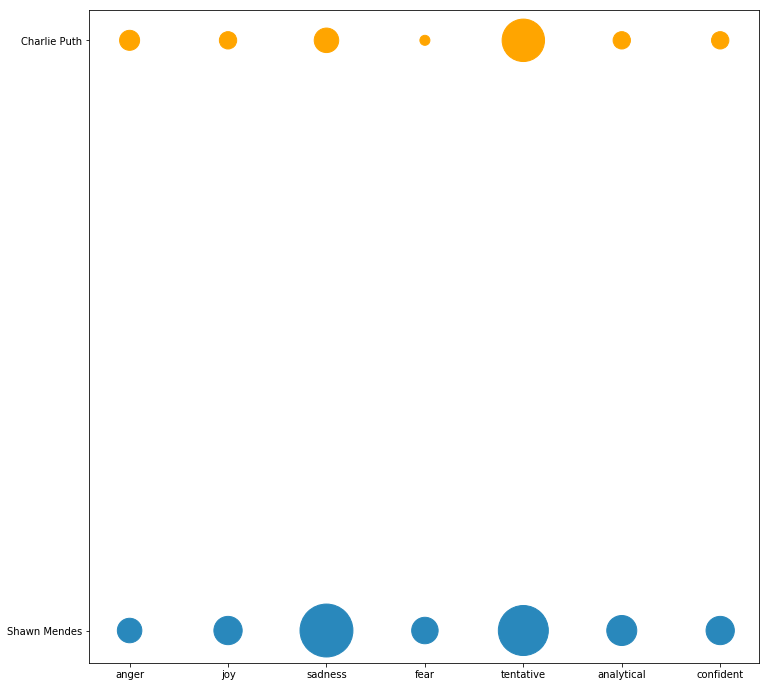

In [304]:
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(senti_shawn.sentiments,senti_shawn.artist,alpha=1,color = '#2988bc',s=senti_shawn.counts*100)
ax.scatter(senti_charlie.sentiments,senti_charlie.artist,alpha=1,color = 'orange',s=senti_charlie.counts*100)
# ax.scatter(senti_charlie.sentiments,senti_charlie.artist,alpha=1,color = 'orange',s=senti_charlie.counts*100)

plt.savefig('count_senti.pdf',bbox_inches='tight')


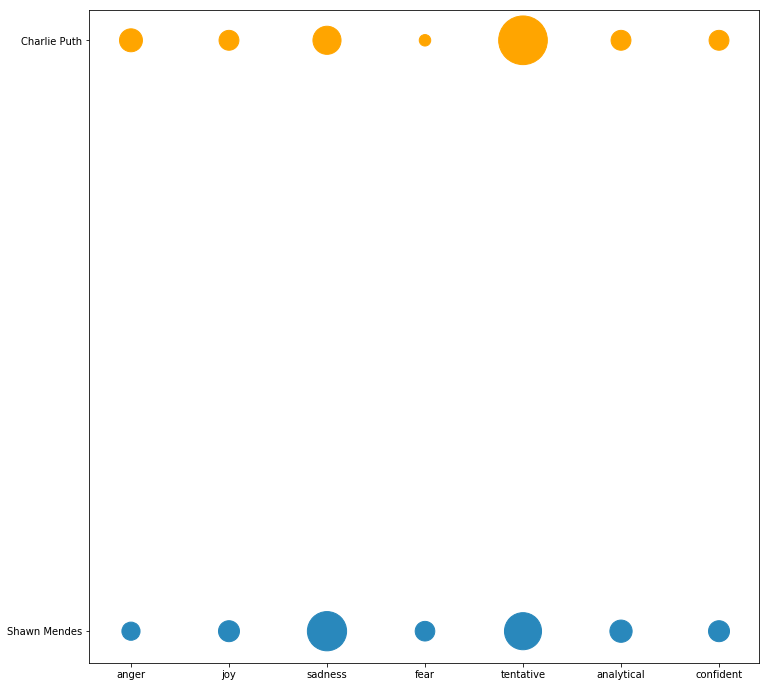

In [305]:
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(senti_shawn.sentiments,senti_shawn.artist,alpha=1,color = '#2988bc',s=((senti_shawn.counts/senti_shawn.counts.sum())*5000))
ax.scatter(senti_charlie.sentiments,senti_charlie.artist,alpha=1,color = 'orange',s=((senti_charlie.counts/senti_charlie.counts.sum())*5000))
# ax.scatter(senti_charlie.sentiments,senti_charlie.artist,alpha=1,color = 'orange',s=senti_charlie.counts*100)
plt.savefig('pct_senti.pdf',bbox_inches='tight')

In [273]:
counts=[]

for senti in ['anger','joy','sadness','fear','tentative','analytical','confident']:
    counts.append(charlie[charlie['sentiments'].str.contains(senti, na=False)].shape[0])

senti_charlie = pd.DataFrame({
    'sentiments':['anger','joy','sadness','fear','tentative','analytical','confident'],
    'counts':counts

})
senti_charlie['artist']='Charlie Puth'

senti_charlie.to_csv('senti_charlie.csv',index=False)
senti_charlie

,sentiments,counts,artist
0,anger,4,Charlie Puth
1,joy,3,Charlie Puth
2,sadness,6,Charlie Puth
3,fear,1,Charlie Puth
4,tentative,18,Charlie Puth
5,analytical,3,Charlie Puth
6,confident,3,Charlie Puth


In [268]:
shawn[shawn['sentiments'].str.contains("anger", na=False)].index.values.astype(list)


array([6, 13, 15, 22, 35, 38], dtype=object)

In [306]:
shawn[shawn['sentiments'].str.contains("joy", na=False)]

,album,artist,lyrics,song,sentiments
4,Shawn Mendes,Shawn Mendes,Sunrise with you on my chest\nNo blinds in the...,Fallin' All In You,"[{'score': 0.5962, 'tone_id': 'joy', 'tone_nam..."
5,Shawn Mendes,Shawn Mendes,"She don't listen to a thing, 'less it feels ri...",Particular Taste,"[{'score': 0.62196, 'tone_id': 'joy', 'tone_na..."
8,Shawn Mendes,Shawn Mendes,It's hard to believe\nYou don't remember me at...,Queen,"[{'score': 0.565925, 'tone_id': 'sadness', 'to..."
13,Illuminate (Deluxe),Shawn Mendes,Do you... do you think about me?\nAnd do you.....,Ruin,"[{'score': 0.67139, 'tone_id': 'joy', 'tone_na..."
20,Illuminate (Deluxe),Shawn Mendes,"Damn, you look so good with your clothes on\nA...",Lights On,"[{'score': 0.8445, 'tone_id': 'joy', 'tone_nam..."
27,Handwritten (Deluxe),Shawn Mendes,I love it when you just don't care\nI love it ...,Life Of The Party,"[{'score': 0.66257, 'tone_id': 'joy', 'tone_na..."
30,Handwritten (Deluxe),Shawn Mendes,I know that we just met\nMaybe this is dumb\nB...,Kid In Love,"[{'score': 0.501726, 'tone_id': 'joy', 'tone_n..."
40,Handwritten (Deluxe),Shawn Mendes,"Oh, there she goes again\nEvery morning, it's ...",Imagination,"[{'score': 0.632984, 'tone_id': 'joy', 'tone_n..."


In [307]:
shawn[shawn['sentiments'].str.contains("sadness", na=False)]

,album,artist,lyrics,song,sentiments
2,Shawn Mendes,Shawn Mendes,All it'd take is one flight\nWe'd be in the sa...,Lost In Japan,"[{'score': 0.501872, 'tone_id': 'sadness', 'to..."
3,Shawn Mendes,Shawn Mendes,"You said, ""I wanna get to know ya""\nWhy you go...",Where Were You In The Morning?,"[{'score': 0.517037, 'tone_id': 'sadness', 'to..."
7,Shawn Mendes,Shawn Mendes,I think it's time that I be honest\nShould've ...,Because I Had You,"[{'score': 0.557903, 'tone_id': 'sadness', 'to..."
8,Shawn Mendes,Shawn Mendes,It's hard to believe\nYou don't remember me at...,Queen,"[{'score': 0.565925, 'tone_id': 'sadness', 'to..."
9,Shawn Mendes,Shawn Mendes,"I want you close to me\nI want you close, I wa...",Mutual,"[{'score': 0.59863, 'tone_id': 'sadness', 'ton..."
10,Shawn Mendes,Shawn Mendes,"Taste the poison from your lips\nLately, we're...",Perfectly Wrong,"[{'score': 0.573378, 'tone_id': 'sadness', 'to..."
12,Illuminate (Deluxe),Shawn Mendes,I wanna follow her where she goes\nI think abo...,There's Nothing Holdin' Me Back,"[{'score': 0.513976, 'tone_id': 'sadness', 'to..."
13,Illuminate (Deluxe),Shawn Mendes,Do you... do you think about me?\nAnd do you.....,Ruin,"[{'score': 0.67139, 'tone_id': 'joy', 'tone_na..."
14,Illuminate (Deluxe),Shawn Mendes,You've got a hold of me\nDon't even know your ...,Mercy,"[{'score': 0.601525, 'tone_id': 'sadness', 'to..."
15,Illuminate (Deluxe),Shawn Mendes,I won't lie to you\nI know he's just not right...,Treat You Better,"[{'score': 0.534773, 'tone_id': 'anger', 'tone..."


In [308]:
shawn[shawn['sentiments'].str.contains("fear", na=False)]

,album,artist,lyrics,song,sentiments
0,Shawn Mendes,Shawn Mendes,"Help me, it's like the walls are caving in\nSo...",In My Blood,"[{'score': 0.605138, 'tone_id': 'fear', 'tone_..."
1,Shawn Mendes,Shawn Mendes,I saw you on a Sunday in a café\nAnd all you d...,Nervous,"[{'score': 0.60734, 'tone_id': 'fear', 'tone_n..."
2,Shawn Mendes,Shawn Mendes,All it'd take is one flight\nWe'd be in the sa...,Lost In Japan,"[{'score': 0.501872, 'tone_id': 'sadness', 'to..."
13,Illuminate (Deluxe),Shawn Mendes,Do you... do you think about me?\nAnd do you.....,Ruin,"[{'score': 0.67139, 'tone_id': 'joy', 'tone_na..."
26,Illuminate (Deluxe),Shawn Mendes,It's not that I'm afraid I'm not enough for he...,Roses,"[{'score': 0.61721, 'tone_id': 'sadness', 'ton..."
28,Handwritten (Deluxe),Shawn Mendes,I thought that I'd been hurt before\nBut no on...,Stitches,"[{'score': 0.621034, 'tone_id': 'fear', 'tone_..."
37,Handwritten (Deluxe),Shawn Mendes,"She would not show that she was afraid,\nBut b...",A Little Too Much,"[{'score': 0.529343, 'tone_id': 'fear', 'tone_..."


In [309]:
shawn[shawn['sentiments'].str.contains("tentative", na=False)]

,album,artist,lyrics,song,sentiments
0,Shawn Mendes,Shawn Mendes,"Help me, it's like the walls are caving in\nSo...",In My Blood,"[{'score': 0.605138, 'tone_id': 'fear', 'tone_..."
1,Shawn Mendes,Shawn Mendes,I saw you on a Sunday in a café\nAnd all you d...,Nervous,"[{'score': 0.60734, 'tone_id': 'fear', 'tone_n..."
2,Shawn Mendes,Shawn Mendes,All it'd take is one flight\nWe'd be in the sa...,Lost In Japan,"[{'score': 0.501872, 'tone_id': 'sadness', 'to..."
3,Shawn Mendes,Shawn Mendes,"You said, ""I wanna get to know ya""\nWhy you go...",Where Were You In The Morning?,"[{'score': 0.517037, 'tone_id': 'sadness', 'to..."
4,Shawn Mendes,Shawn Mendes,Sunrise with you on my chest\nNo blinds in the...,Fallin' All In You,"[{'score': 0.5962, 'tone_id': 'joy', 'tone_nam..."
5,Shawn Mendes,Shawn Mendes,"She don't listen to a thing, 'less it feels ri...",Particular Taste,"[{'score': 0.62196, 'tone_id': 'joy', 'tone_na..."
6,Shawn Mendes,Shawn Mendes,"I know a girl, she's like a curse\nWe want eac...",Why,"[{'score': 0.67259, 'tone_id': 'anger', 'tone_..."
7,Shawn Mendes,Shawn Mendes,I think it's time that I be honest\nShould've ...,Because I Had You,"[{'score': 0.557903, 'tone_id': 'sadness', 'to..."
11,Shawn Mendes,Shawn Mendes,Maybe I had too many drinks but that's just wh...,When You're Ready,"[{'score': 0.94688, 'tone_id': 'tentative', 't..."
15,Illuminate (Deluxe),Shawn Mendes,I won't lie to you\nI know he's just not right...,Treat You Better,"[{'score': 0.534773, 'tone_id': 'anger', 'tone..."


In [310]:
shawn[shawn['sentiments'].str.contains("confident", na=False)]

,album,artist,lyrics,song,sentiments
10,Shawn Mendes,Shawn Mendes,"Taste the poison from your lips\nLately, we're...",Perfectly Wrong,"[{'score': 0.573378, 'tone_id': 'sadness', 'to..."
12,Illuminate (Deluxe),Shawn Mendes,I wanna follow her where she goes\nI think abo...,There's Nothing Holdin' Me Back,"[{'score': 0.513976, 'tone_id': 'sadness', 'to..."
13,Illuminate (Deluxe),Shawn Mendes,Do you... do you think about me?\nAnd do you.....,Ruin,"[{'score': 0.67139, 'tone_id': 'joy', 'tone_na..."
20,Illuminate (Deluxe),Shawn Mendes,"Damn, you look so good with your clothes on\nA...",Lights On,"[{'score': 0.8445, 'tone_id': 'joy', 'tone_nam..."
22,Illuminate (Deluxe),Shawn Mendes,"You pick me up, it's late at night\nThis is th...",Patience,"[{'score': 0.51248, 'tone_id': 'anger', 'tone_..."
29,Handwritten (Deluxe),Shawn Mendes,I promise that one day I'll be around \nI'll k...,Never Be Alone,"[{'score': 0.543513, 'tone_id': 'sadness', 'to..."
33,Handwritten (Deluxe),Shawn Mendes,All the strings attached girl\nAll the strings...,Strings,"[{'score': 0.608592, 'tone_id': 'sadness', 'to..."
37,Handwritten (Deluxe),Shawn Mendes,"She would not show that she was afraid,\nBut b...",A Little Too Much,"[{'score': 0.529343, 'tone_id': 'fear', 'tone_..."


In [311]:
shawn[shawn['sentiments'].str.contains("analytical", na=False)]

,album,artist,lyrics,song,sentiments
23,Illuminate (Deluxe),Shawn Mendes,She got a bad reputation\nShe takes the long w...,Bad Reputation,"[{'score': 0.660079, 'tone_id': 'analytical', ..."
26,Illuminate (Deluxe),Shawn Mendes,It's not that I'm afraid I'm not enough for he...,Roses,"[{'score': 0.61721, 'tone_id': 'sadness', 'ton..."
31,Handwritten (Deluxe),Shawn Mendes,"Oh, you waited so long\nSometimes it's hard to...",I Don't Even Know Your Name,"[{'score': 0.729051, 'tone_id': 'sadness', 'to..."
36,Handwritten (Deluxe),Shawn Mendes,Think I don't need a watch to tell the time\nT...,Crazy,"[{'score': 0.591011, 'tone_id': 'sadness', 'to..."
38,Handwritten (Deluxe),Shawn Mendes,I watch your troubled eyes as you rest\nAnd I ...,This Is What It Takes,"[{'score': 0.54541, 'tone_id': 'anger', 'tone_..."
39,Handwritten (Deluxe),Shawn Mendes,Taking it slow isn't easy\nIf as far as you go...,Bring It Back,"[{'score': 0.65932, 'tone_id': 'sadness', 'ton..."
42,Handwritten (Deluxe),Shawn Mendes,"Ah-ah, he-ey\nAh-ah, ah-ah\nAh-ah, he-ey\nAh-a...",I Know What You Did Last Summer,"[{'score': 0.570414, 'tone_id': 'sadness', 'to..."
67,Shawn Mendes,Shawn Mendes,"Don't cry, or do whatever makes you feel comfo...",Like To Be You feat. Julia Michaels,"[{'score': 0.592608, 'tone_id': 'sadness', 'to..."
68,Shawn Mendes,Shawn Mendes,"Here I am, stuck on this couch Scrolling throu...",Youth feat. Khalid,"[{'score': 0.833352, 'tone_id': 'sadness', 'to..."


In [312]:
charlie[charlie['sentiments'].str.contains("anger", na=False)]


,album,artist,lyrics,song,sentiments
47,Voicenotes,Charlie Puth,These mistakes I made my fair share\nWhen you ...,Patient,"[{'score': 0.63779, 'tone_id': 'anger', 'tone_..."
56,Nine Track Mind (Deluxe),Charlie Puth,"This is gonna hurt but I blame myself first, '...",Dangerously,"[{'score': 0.514298, 'tone_id': 'anger', 'tone..."
60,Nine Track Mind (Deluxe),Charlie Puth,I'd stroll into a bank and put a ski mask on\n...,My Gospel,"[{'score': 0.531324, 'tone_id': 'anger', 'tone..."
73,Nine Track Mind (Deluxe),Charlie Puth,I'm facing the bottle for all of my problems T...,Nothing But Trouble - Instagram Models Dance R...,"[{'score': 0.648057, 'tone_id': 'anger', 'tone..."


In [246]:


charlie[charlie['sentiments'].str.contains("joy", na=False)]



(3, 5)

In [313]:
charlie[charlie['sentiments'].str.contains("sadness", na=False)]



,album,artist,lyrics,song,sentiments
50,Voicenotes,Charlie Puth,"I've got a situation, this girl been stressing...",Slow It Down,"[{'score': 0.697659, 'tone_id': 'sadness', 'to..."
51,Voicenotes,Charlie Puth,Why are we looking down\nOn our sisters and br...,Change (feat. James Taylor),"[{'score': 0.651565, 'tone_id': 'sadness', 'to..."
53,Voicenotes,Charlie Puth,"Ooh, the way that you dance on me makes me not...",Empty Cups,"[{'score': 0.674494, 'tone_id': 'sadness', 'to..."
54,Voicenotes,Charlie Puth,You could say I lived a crazy life for a man s...,Through It All,"[{'score': 0.53841, 'tone_id': 'sadness', 'ton..."
62,Nine Track Mind (Deluxe),Charlie Puth,Oh I been hurting lately\nI'm down on all my l...,Left Right Left,"[{'score': 0.635289, 'tone_id': 'sadness', 'to..."
72,Nine Track Mind (Deluxe),Charlie Puth,"Tell me lies, like how you're better off witho...",Does It Feel,"[{'score': 0.79915, 'tone_id': 'sadness', 'ton..."


In [317]:
charlie[charlie['sentiments'].str.contains("fear", na=False)]

,album,artist,lyrics,song,sentiments
48,Voicenotes,Charlie Puth,"No, this is not goodbye\nI swear that I'm gonn...",If You Leave Me Now (feat. Boyz II Men),"[{'score': 0.695081, 'tone_id': 'fear', 'tone_..."


In [318]:
charlie[charlie['sentiments'].str.contains('tentative',na=False)]

,album,artist,lyrics,song,sentiments
43,Voicenotes,Charlie Puth,Yeah\n\nMaybe I'ma get a little anxious\nMaybe...,The Way I Am,"[{'score': 0.967459, 'tone_id': 'tentative', '..."
44,Voicenotes,Charlie Puth,"You've been runnin' round, runnin' round, runn...",Attention,"[{'score': 0.582015, 'tone_id': 'tentative', '..."
45,Voicenotes,Charlie Puth,"Alright\nOoh, yeah\n\nI'll admit, I was wrong,...",How Long,"[{'score': 0.730788, 'tone_id': 'tentative', '..."
47,Voicenotes,Charlie Puth,These mistakes I made my fair share\nWhen you ...,Patient,"[{'score': 0.63779, 'tone_id': 'anger', 'tone_..."
49,Voicenotes,Charlie Puth,I got these girls tryna lock me down\nAnd I al...,BOY,"[{'score': 0.902459, 'tone_id': 'tentative', '..."
51,Voicenotes,Charlie Puth,Why are we looking down\nOn our sisters and br...,Change (feat. James Taylor),"[{'score': 0.651565, 'tone_id': 'sadness', 'to..."
52,Voicenotes,Charlie Puth,I was just with you on your birthday\nAnd I me...,Somebody Told Me,"[{'score': 0.965967, 'tone_id': 'tentative', '..."
53,Voicenotes,Charlie Puth,"Ooh, the way that you dance on me makes me not...",Empty Cups,"[{'score': 0.674494, 'tone_id': 'sadness', 'to..."
55,Nine Track Mind (Deluxe),Charlie Puth,I'm only one call away\nI'll be there to save ...,One Call Away,"[{'score': 0.779803, 'tone_id': 'tentative', '..."
57,Nine Track Mind (Deluxe),Charlie Puth,Let's Marvin Gaye and get it on\nYou got the h...,Marvin Gaye (feat. Meghan Trainor),"[{'score': 0.761947, 'tone_id': 'joy', 'tone_n..."


In [319]:
charlie[charlie['sentiments'].str.contains('analytical',na=False)]

,album,artist,lyrics,song,sentiments
63,Nine Track Mind (Deluxe),Charlie Puth,Some girls walk in the room and everything rem...,Then There's You,"[{'score': 0.701926, 'tone_id': 'joy', 'tone_n..."
66,Nine Track Mind (Deluxe),Charlie Puth,"When I'm old and grown\nI won't sleep alone, w...",Some Type Of Love,"[{'score': 0.590389, 'tone_id': 'joy', 'tone_n..."
72,Nine Track Mind (Deluxe),Charlie Puth,"Tell me lies, like how you're better off witho...",Does It Feel,"[{'score': 0.79915, 'tone_id': 'sadness', 'ton..."


In [320]:
charlie[charlie['sentiments'].str.contains('confident',na=False)]

,album,artist,lyrics,song,sentiments
54,Voicenotes,Charlie Puth,You could say I lived a crazy life for a man s...,Through It All,"[{'score': 0.53841, 'tone_id': 'sadness', 'ton..."
61,Nine Track Mind (Deluxe),Charlie Puth,Well I get the thrill run down my spine\nWhen ...,Up All Night,"[{'score': 0.778599, 'tone_id': 'confident', '..."
65,Nine Track Mind (Deluxe),Charlie Puth,Thinking back in time when I had you to lose\n...,As You Are (feat. Shy Carter),"[{'score': 0.614489, 'tone_id': 'confident', '..."
